In [68]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

In [69]:
data = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [70]:
data2 = data.set_index("Country")


In [71]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
Country,,,
Åland,1743-11-01,4.384,2.294
Åland,1743-12-01,NaN,NaN
Åland,1744-01-01,NaN,NaN
Åland,1744-02-01,NaN,NaN
Åland,1744-03-01,NaN,NaN


In [72]:
data2 = data2.loc['Guatemala']

In [73]:
data2.shape

(2265, 3)

In [74]:
explore(data2)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
AverageTemperature,float64,2226,39,0.017,1826,18.232,21.82975,23.4985,24.38375,26.665,23.11165,23.4985,1.631856,-0.438786
AverageTemperatureUncertainty,float64,2226,39,0.017,1167,0.1,0.336,0.5915,1.118,3.822,0.771264,0.5915,0.542986,1.263673
dt,object,2265,0,0.000,2265,1825-01-01,-,-,-,2013-09-01,-,-,-,-


In [75]:
profiler = ProfileReport(data2)

In [76]:
# Reporte a html para poder visualizarlo en un navegador
html = profiler.to_html()
file = open("reporte_guatemala.html", "w", encoding="utf-8")
file.write(html)
file.close()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
data2['dt'] = pd.to_datetime(data2['dt'])

In [78]:
#get month from date
data2['month'] = data2['dt'].dt.month

In [79]:
# month were average temperature is highest
mes_mayortemp = data2.groupby('month').mean()['AverageTemperature']

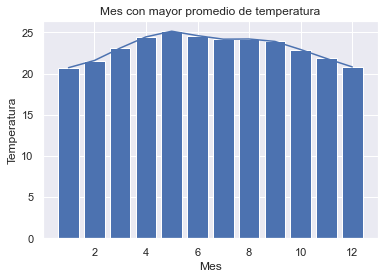

In [80]:
# graph of month with highest average temperature
plt.bar(mes_mayortemp.index, mes_mayortemp)
plt.plot(mes_mayortemp)
plt.title('Mes con mayor promedio de temperatura')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.show()

#### Se puede observar que en Guatemala, los meses con mayor temparatura son mayo y junio, mientras que enero y diciembre son los meses con menor temperatura. No obstante, la temperatura por cada mes no suele ser menor a 20 grados o mayor a 25 grados. 

In [81]:
#group by country and get average temperature
data_country = data2.groupby('Country')['AverageTemperature'].mean()

In [82]:
#group by contry and month and get average temperature
data_country_month = data2.groupby(['Country', 'month'])['AverageTemperature'].mean()

In [83]:
data_country_month.sort_values(ascending=True).head(10)

Country    month
Guatemala  1        20.707797
           12       20.801739
           2        21.576791
           11       21.824272
           10       22.909554
           3        23.087289
           9        23.895524
           7        24.167022
           8        24.189281
           4        24.445161
Name: AverageTemperature, dtype: float64

#### Como fue mencionado anteriormente, se puede ver que las temperaturas más bajas en Guatemala, en promedio, son de más de 20.5 en los meses de enero y diciembre.

In [84]:
data_country_month.sort_values(ascending=False).head(10)

Country    month
Guatemala  5        25.133285
           6        24.598226
           4        24.445161
           8        24.189281
           7        24.167022
           9        23.895524
           3        23.087289
           10       22.909554
           11       21.824272
           2        21.576791
Name: AverageTemperature, dtype: float64

#### En cambio, se puede ver que las temperaturas más altas en Guatemala, en promedio, son de nos más 25 grados el mes de mayo, junio y abril. 

In [85]:
data2.drop(columns=['month'], inplace=True)

In [86]:
#get year from date
data2['year'] = data2['dt'].dt.year

In [87]:
# year were average temperature is highest
year_mayortemp = data2.groupby('year').mean()['AverageTemperature']

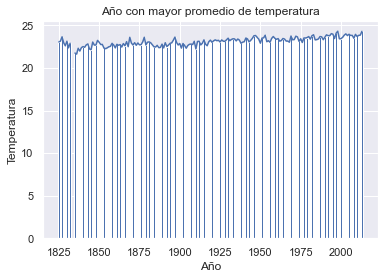

In [88]:
# graph of year with highest average temperature
plt.bar(year_mayortemp.index, year_mayortemp)
plt.plot(year_mayortemp)
plt.title('Año con mayor promedio de temperatura')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.show()

#### Se puede observar que en Guatemala, los años con mayor temparatura son 1998 y 2013, mientras que 1836 y 1835 son los años con menor temperatura.

In [89]:
#group by contry and year and get average temperature
data_country_year = data2.groupby(['Country', 'year'])['AverageTemperature'].mean()

In [90]:
data_country_year.sort_values(ascending=True).head(10)

Country    year
Guatemala  1836    21.621333
           1835    21.741667
           1838    21.982000
           1845    22.138833
           1844    22.220833
           1910    22.233250
           1854    22.262917
           1837    22.304417
           1904    22.309333
           1853    22.317500
Name: AverageTemperature, dtype: float64

#### Como fue mencionado anteriormente, se puede ver que las temperaturas más bajas en Guatemala, en promedio, son de más de 21.7 en los años de 1836, 1835 y 1838.

In [91]:
data_country_year.sort_values(ascending=False).head(10)

Country    year
Guatemala  1998    24.306500
           2013    24.291333
           1997    24.076833
           1994    24.021667
           2003    23.993833
           1995    23.960667
           2005    23.948250
           2009    23.939917
           1983    23.889000
           1991    23.877583
Name: AverageTemperature, dtype: float64

#### En cambio, se puede ver que las temperaturas más altas en Guatemala, en promedio, son de nos más 24.4 grados en los años 1998, 2013, 1997 y 1994.

In [92]:
data2.drop(columns=['year'], inplace=True)

# Series de tiempo

In [93]:
uni = data2[['dt', 'AverageTemperature']]
uni.dropna(inplace=True)
uni

/var/folders/7v/q__s863s77v1wy7dl0jwhcd00000gn/T/ipykernel_76843/2870651412.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dt,AverageTemperature
Country,,
Guatemala,1825-01-01,21.204
Guatemala,1825-02-01,21.584
Guatemala,1825-03-01,23.038
Guatemala,1825-04-01,25.276
Guatemala,1825-05-01,24.995
...,...,...
Guatemala,2013-05-01,25.704
Guatemala,2013-06-01,25.048
Guatemala,2013-07-01,24.588


### Elegimos un inicio, fin y frecuencia para nuestra serie

* inicio: 2005
* fin: 2013
* frecuencia: mensual

In [94]:
INICIO = 2005
FINAL = 2013

interval = uni[uni['dt'].dt.year >= INICIO]
interval = interval[interval['dt'].dt.year <= FINAL]
interval

,dt,AverageTemperature
Country,,
Guatemala,2005-01-01,20.854
Guatemala,2005-02-01,22.353
Guatemala,2005-03-01,25.090
Guatemala,2005-04-01,25.486
Guatemala,2005-05-01,25.861
...,...,...
Guatemala,2013-05-01,25.704
Guatemala,2013-06-01,25.048
Guatemala,2013-07-01,24.588


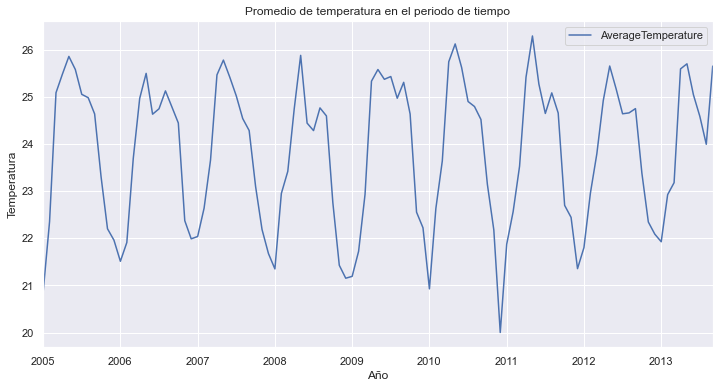

In [95]:
# Agrupar por mes y obtener el promedio de temperatura y graficarlo
interval_mean = interval.groupby('dt').mean()
interval_mean.plot(figsize=(12, 6))
plt.title('Promedio de temperatura en el periodo de tiempo')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.show()


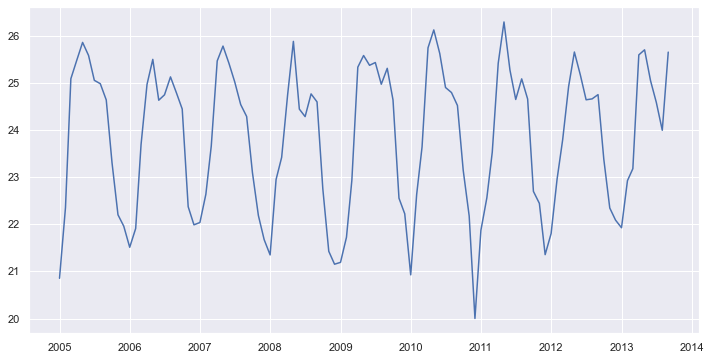

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(interval['dt'], interval['AverageTemperature'])

## Componentes de la serie


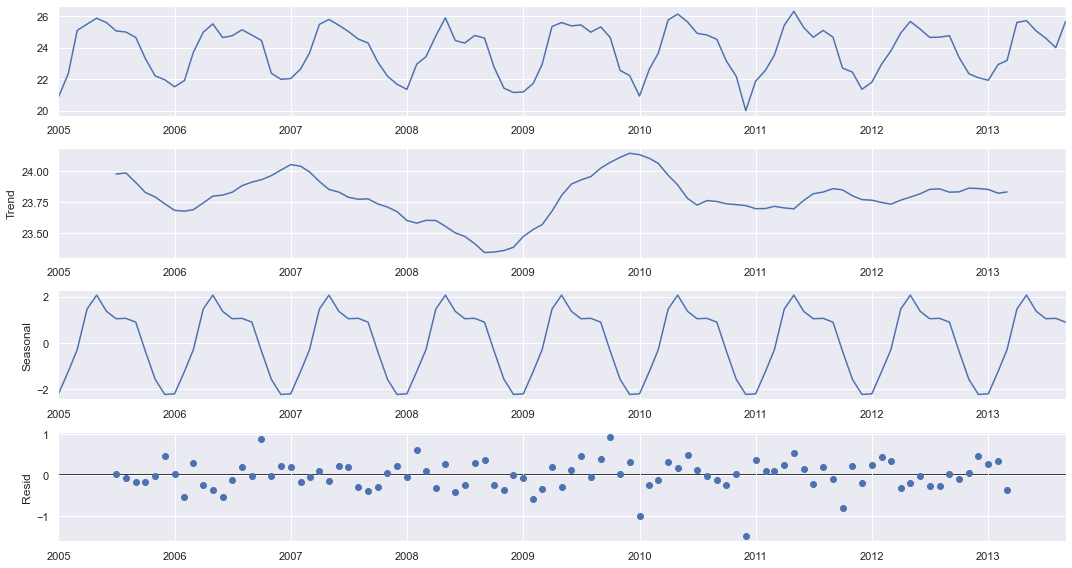

In [97]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(interval_mean, model='additive')
fig = decomposition.plot()
plt.show()

Se puede observar que los componentes de los datos no tienen una tendencia muy marcada pero si son estacionarios durante el intervalo de tiempo del 2005-2013. 

### Thumb Rule for Statistical Tests

* ADF: Autoregressive Determination Factors -> si el valor de p is menor que el valor critico, la serie es estacionaria
* OSCB: Order Statistics Check -> si el valor es menor a 0.64, la serie es estacionaria

In [98]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(interval_mean))

Results of Dickey-Fuller Test:
Test Statistic                 -2.647337
p-value                         0.083603
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -2.647337
p-value                         0.083603
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


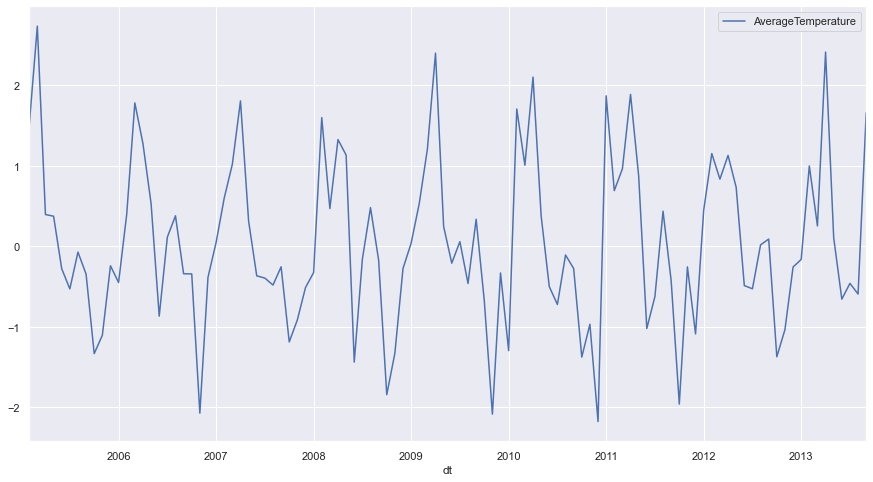

In [99]:
ts_t_adj = interval_mean - interval_mean.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(interval_mean))

<AxesSubplot:xlabel='dt'>

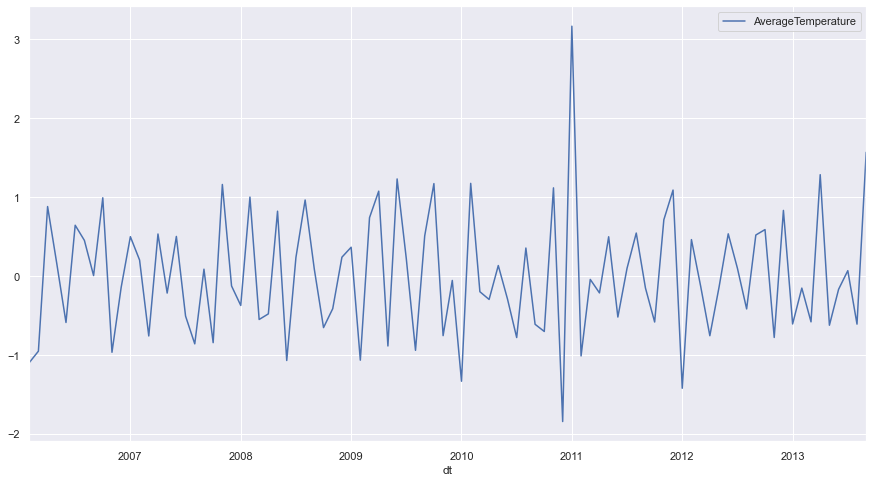

In [100]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

## Probando diferentes modelos

/Users/srue/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/srue/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/srue/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



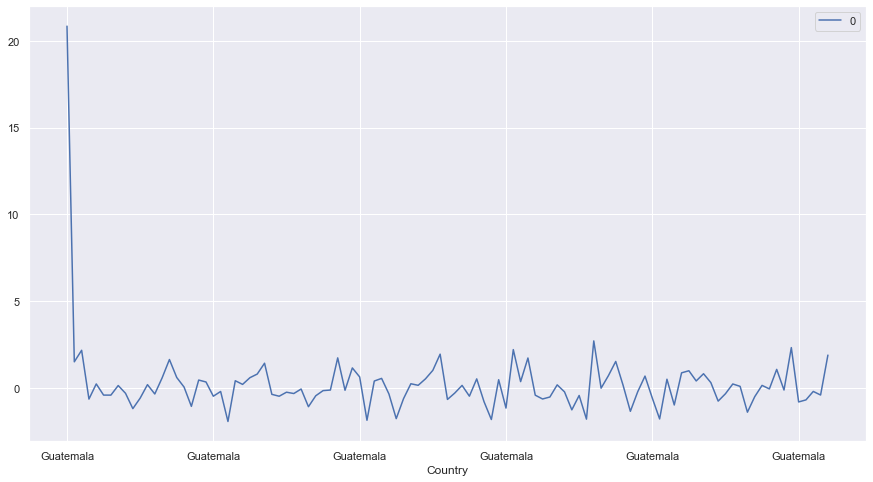

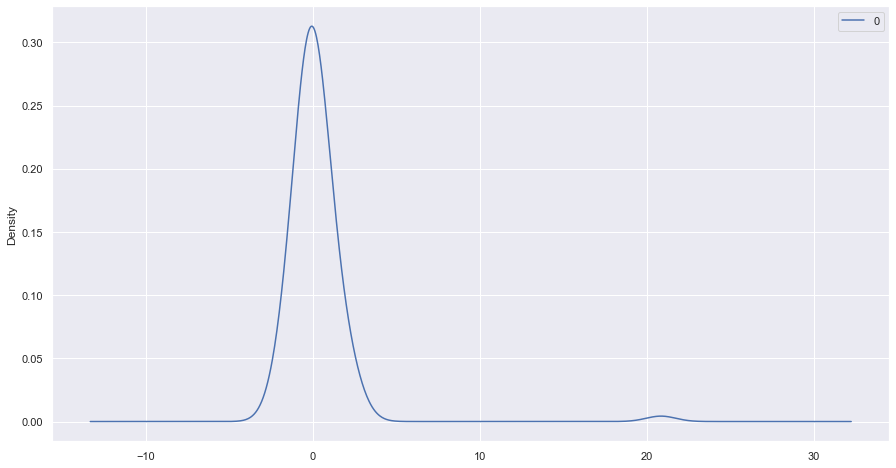

                0
count  105.000000
mean     0.232892
std      2.247800
min     -1.942243
25%     -0.486051
50%     -0.063741
75%      0.542790
max     20.854000


In [101]:
from statsmodels.tsa.arima.model import ARIMA

y = interval['AverageTemperature']

model = ARIMA(y, order=(1, 1, 0))
history = model.fit()
history.summary()

residuals = pd.DataFrame(history.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Se entreno un modelo con nuestra informacion para poder graficar los resultados y poder analizar mas a fondo los resultados que se obtenian entrenando un modelo de Arima para nuestros datos de la serie de tiempo.

### Evaluando el modelo

predicted=24.551285, expected=23.146000
predicted=22.782093, expected=22.178000
predicted=21.913086, expected=20.001000
predicted=19.280314, expected=21.872000
predicted=22.761025, expected=22.565000
predicted=23.689972, expected=23.530000
predicted=23.920034, expected=25.419000
predicted=25.921320, expected=26.295000
predicted=26.240892, expected=25.274000
predicted=24.439581, expected=24.650000
predicted=23.795319, expected=25.087000
predicted=24.910981, expected=24.659000
predicted=24.603056, expected=22.699000
predicted=22.257220, expected=22.444000
predicted=22.490858, expected=21.356000
predicted=21.154313, expected=21.803000
predicted=22.266944, expected=22.957000
predicted=23.865623, expected=23.793000
predicted=24.252515, expected=24.924000
predicted=25.330356, expected=25.657000
predicted=25.594942, expected=25.170000
predicted=24.569412, expected=24.643000
predicted=24.046726, expected=24.662000
predicted=24.383234, expected=24.753000
predicted=24.778851, expected=23.381000


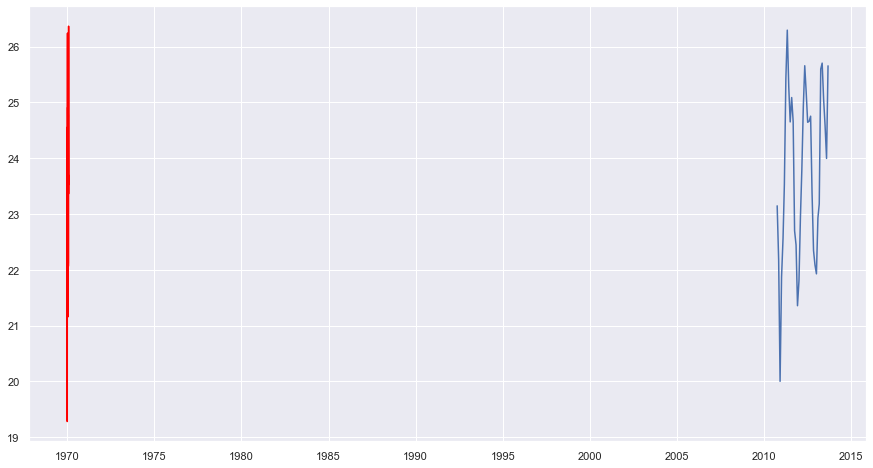

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = interval_mean['AverageTemperature']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Se analizaron las predicciones del modelo con los valores reales o esperados. Para el test de RMSE, el resultado obtenido fue de 1.040 lo cual refleja una escasa capacidad del modelo para predecir con precisión los datos. Por lo cual se intentara poder predecir los datos utilizando Prophet para entrenar y analizar el modelo.

### Preparando los datos para crear el modelo Prophet

In [103]:
df = data2.copy()

In [105]:
#delete columns AverageTemperatureUncertainty 
df.drop(columns=['AverageTemperatureUncertainty'], inplace=True)

In [106]:
df['dt'] = pd.DatetimeIndex(df['dt'])

In [107]:
df = df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})

In [108]:
#delete rows with NaN
df.dropna(inplace=True)
#fix index
df.reset_index(drop=True, inplace=True)

### Creando modelo con Prophet para predecir 3 años anteriores

In [109]:
df_anterior = df[df.ds < '2011-01-01']

In [111]:
from prophet import Prophet

In [112]:
modelo1 = Prophet(interval_width=0.95)

In [113]:
modelo1.fit(df_anterior)

14:12:54 - cmdstanpy - INFO - Chain [1] start processing
14:12:57 - cmdstanpy - INFO - Chain [1] done processing


In [114]:
fechas_futuras = modelo1.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

,ds
2224,2013-08-01
2225,2013-09-01
2226,2013-10-01
2227,2013-11-01
2228,2013-12-01


In [115]:
prediccion = modelo1.predict(fechas_futuras)

In [116]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2224,2013-08-01,24.992893,23.894704,26.042652
2225,2013-09-01,24.699474,23.638435,25.822608
2226,2013-10-01,23.764091,22.723470,24.831147
2227,2013-11-01,22.634218,21.480085,23.682147
2228,2013-12-01,21.620614,20.509231,22.669076


In [117]:
ultimos3_pred = prediccion[prediccion.ds > '2011-01-01']

In [118]:
ultimos3 = df[df.ds > '2011-01-01']

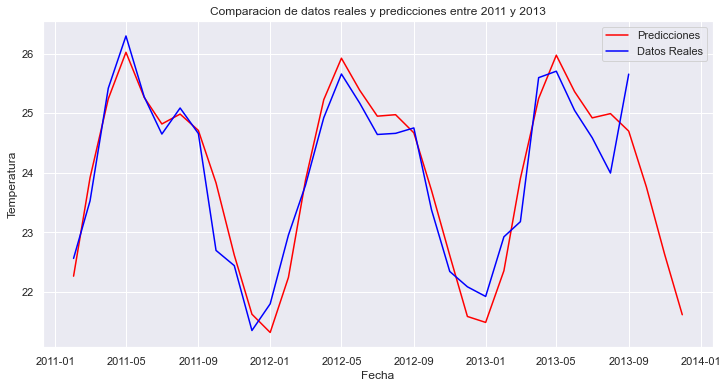

In [119]:
ultimos3_grouped = ultimos3.groupby(['ds']).mean()
plt.figure(figsize=(12, 6))
plt.plot(ultimos3_pred['ds'], ultimos3_pred['yhat'], color='red', label='Prediccion')
plt.plot(ultimos3_grouped, color='blue', label='Datos Reales')
plt.title('Comparacion de datos reales y predicciones entre 2011 y 2013')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend(['Predicciones', 'Datos Reales'])
plt.show()

 Como se puede observar, la prediccion de los ultimos 3 años (rojo), es decir entre 2011 y 2013, fue muy certera en comparacion con los datos reales (azul) de esos años. Se puede decir que el modelo dio buenos resultados.

Las predicciones de este modelo parecen ser mas acertadas que nuestro modelo con ARIMA, por lo que decidimos utilizar este modelo para poder predecir los siguiente 3 años. Y asi poder obtener datos mas precisos con la tendencia de nuestros datos. De esta forma será posible determinar si la temperatura subira o se mantendra estable en futuros años. 

### Creando el modelo con Prophet para predecir 3 años en un futuro

In [120]:
mi_modelo = Prophet(interval_width=0.95)

In [121]:
mi_modelo.fit(df)

14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

,ds
2257,2016-05-01
2258,2016-06-01
2259,2016-07-01
2260,2016-08-01
2261,2016-09-01


In [123]:
prediccion = mi_modelo.predict(fechas_futuras)

In [124]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2257,2016-05-01,25.957583,24.863621,27.021005
2258,2016-06-01,25.419839,24.334248,26.537733
2259,2016-07-01,24.982819,23.916466,26.026329
2260,2016-08-01,25.005437,23.915143,26.110597
2261,2016-09-01,24.713646,23.525605,25.901096


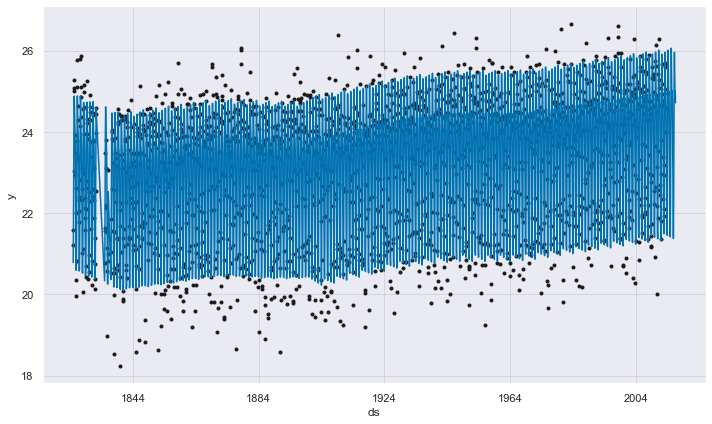

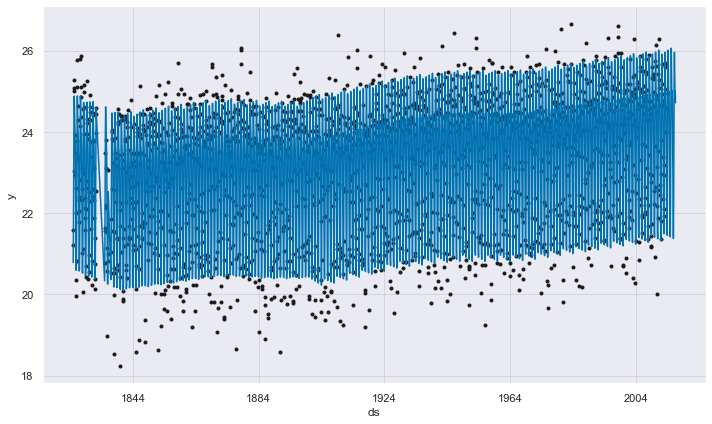

In [125]:
mi_modelo.plot(prediccion, uncertainty=False)

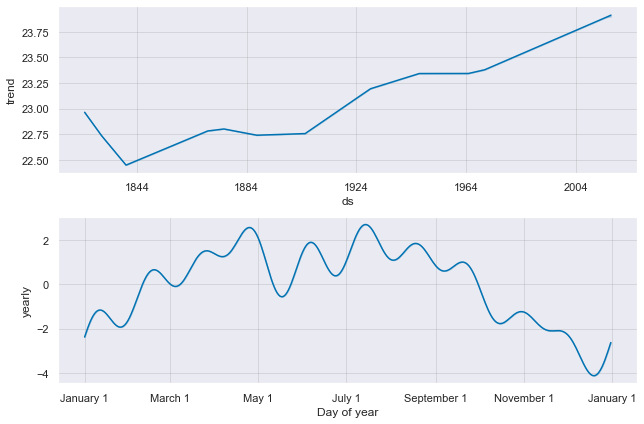

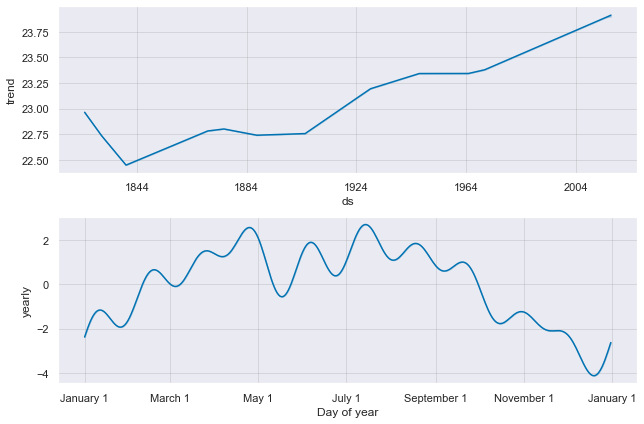

In [126]:
mi_modelo.plot_components(prediccion)

Se puede observar en la grafica de tendencias que la temperatura de Guatemala ha ido incrementando con el paso de los años, lo que nos demuestra que el calentamiento global tambien esta afectando el pais.

Por medio de Prophet, en los próximos tres años, se puede decir que la temperatura seguirá creciendo. Por lo tanto, se puede afirmar la presencia de un cambio climatico emergente y el calentamiento global es un hecho.